In [404]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [405]:
df = pd.read_csv('glass.csv')
pd.concat([df.head(), df.tail()])

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.00,2.08,73.36,0.00,8.62,1.67,0.0,7


In [406]:
df.describe(include='all')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [407]:
y = df['Type']
X = df.drop('Type', axis=1)
y.value_counts().sort_index()

Type
1    70
2    76
3    17
5    13
6     9
7    29
Name: count, dtype: int64

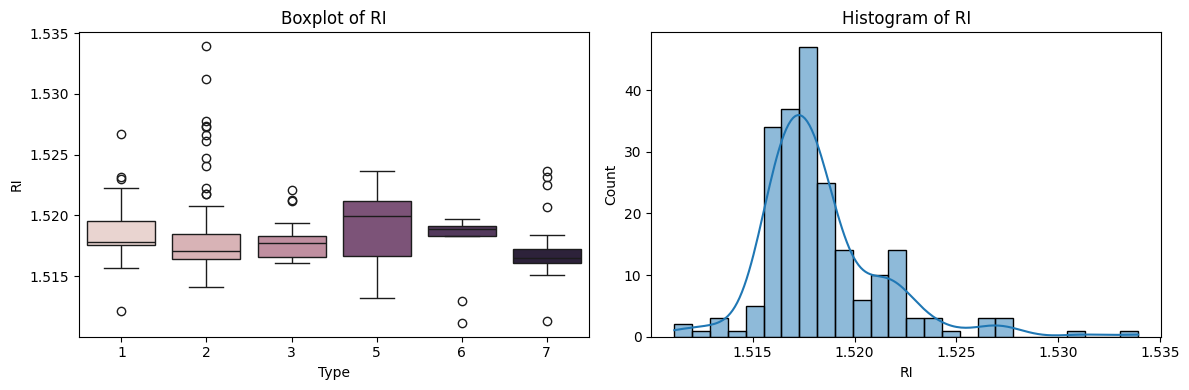

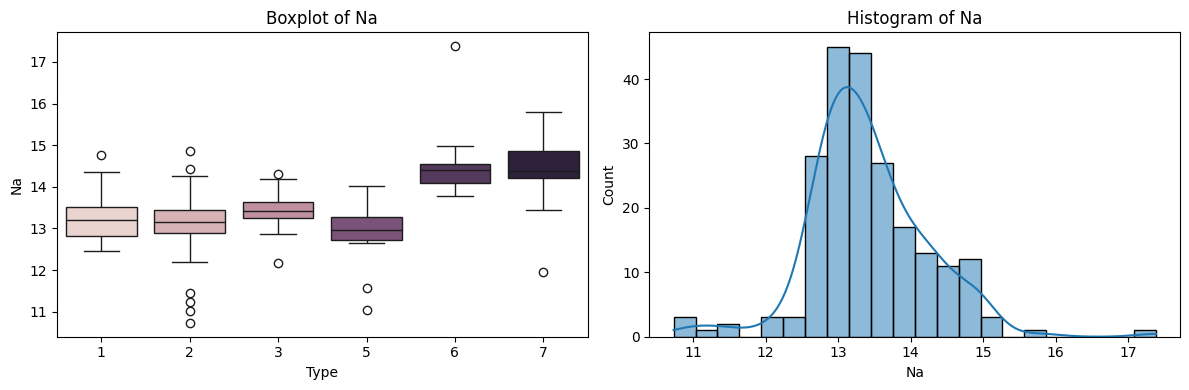

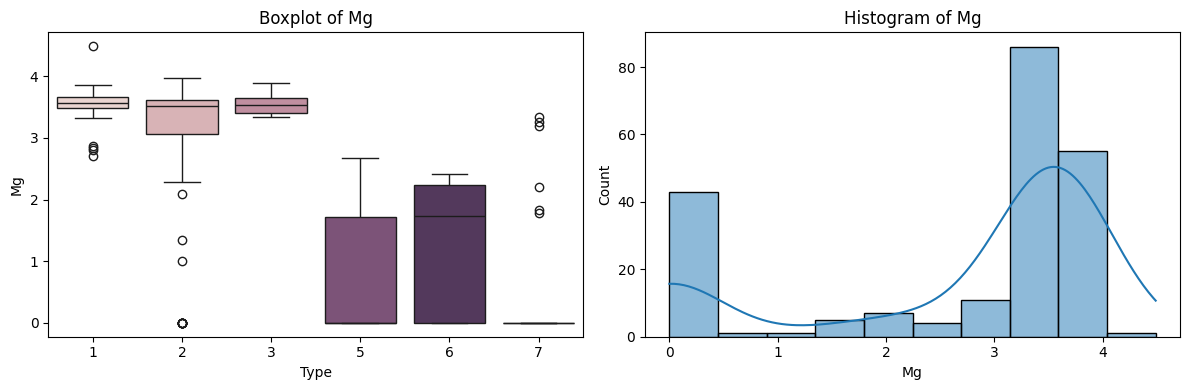

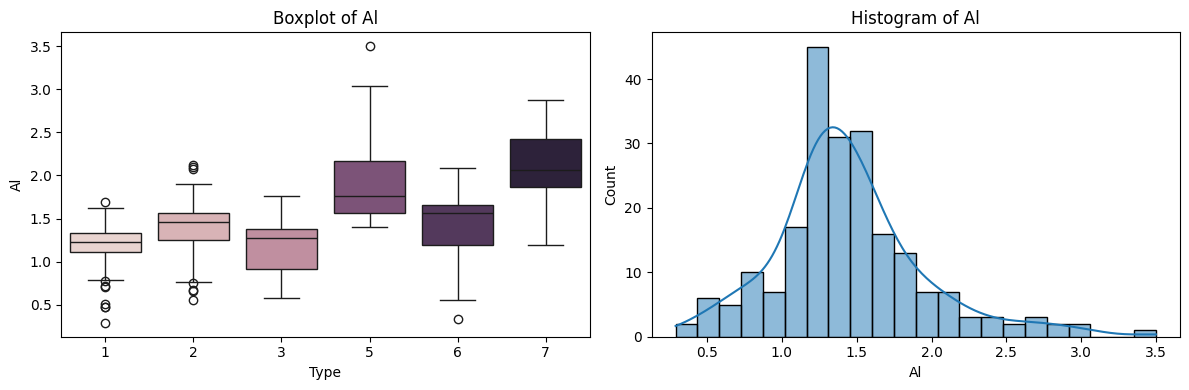

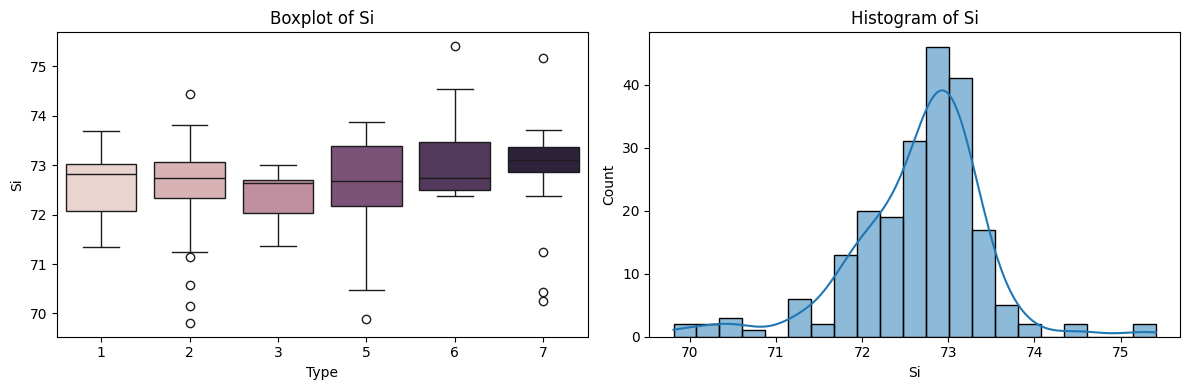

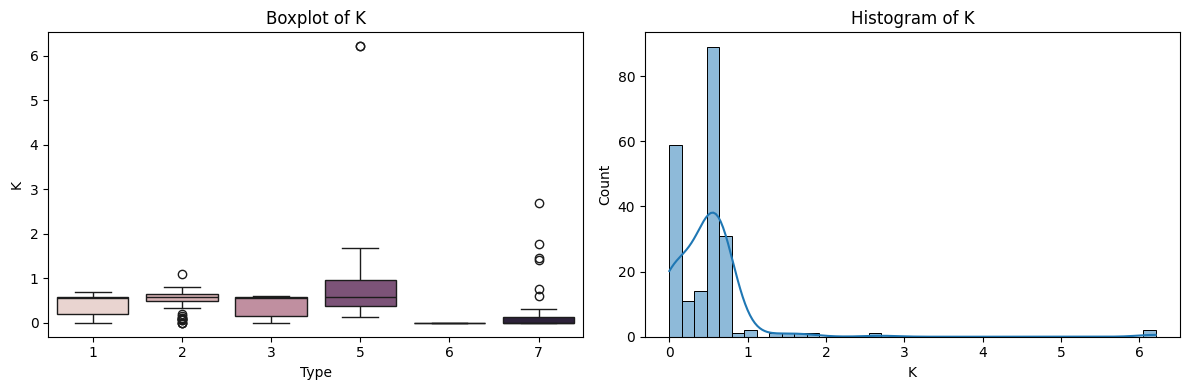

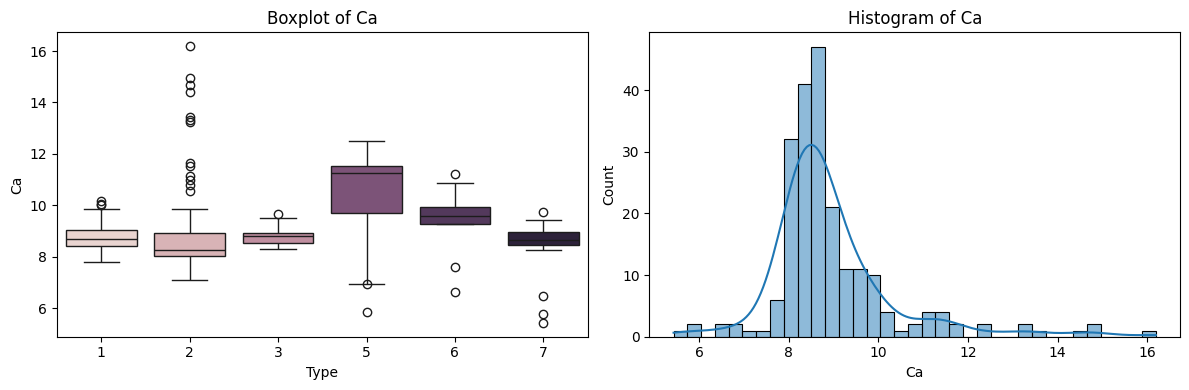

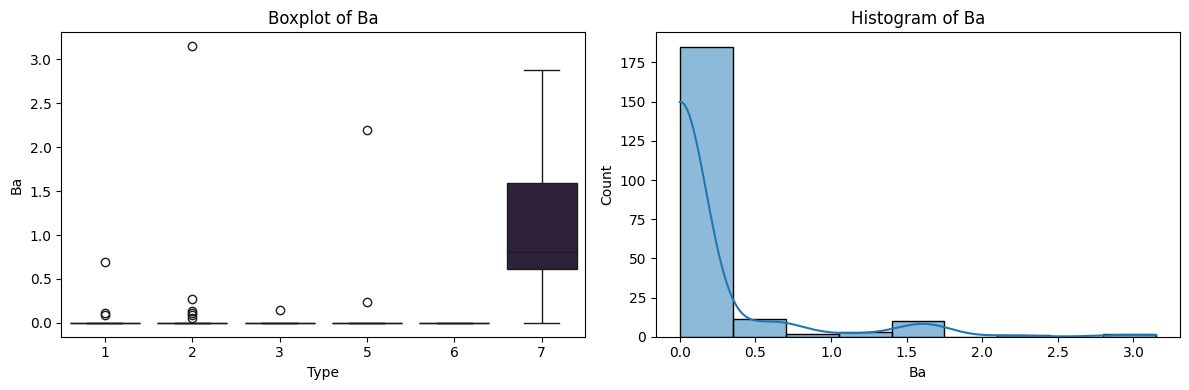

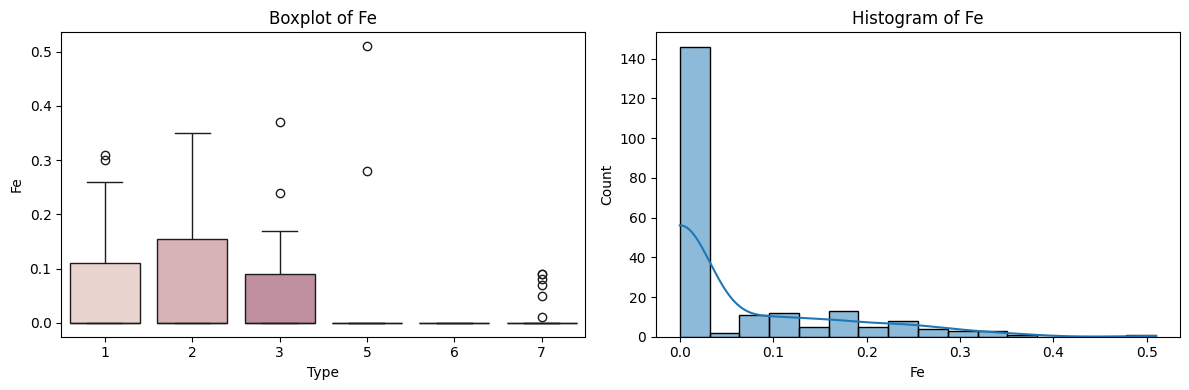

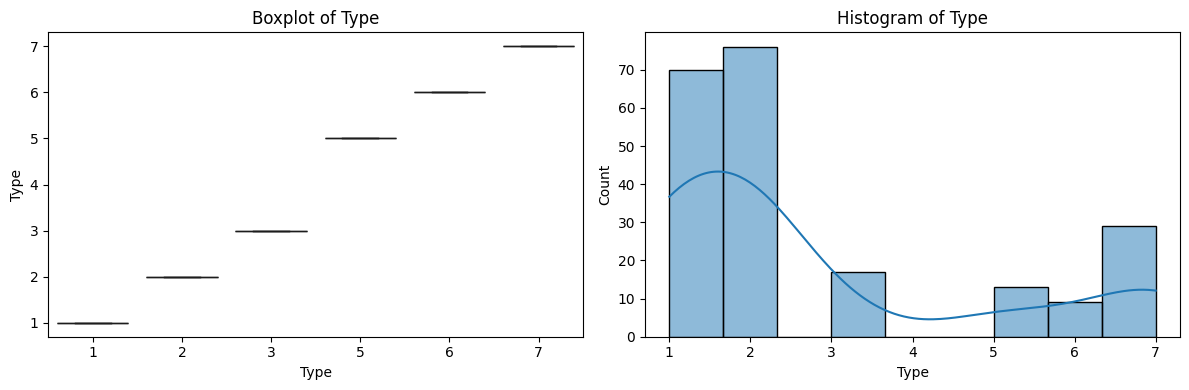

In [408]:
for column in df.columns:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[column], hue=y, x=y, legend=False)
    plt.title(f'Boxplot of {column}')
    plt.subplot(1, 2, 2)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.tight_layout()
    plt.show()


In [409]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((171, 9), (43, 9))

In [410]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.90      0.64      0.75        14
           3       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.84      0.86        43
weighted avg       0.87      0.84      0.83        43



In [411]:
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor

classifiers = {
    "OCSVM": OneClassSVM(nu=0.05), # nu - % выбросов
    "IsoForest": IsolationForest(contamination=0.05, random_state=42),
    "ELL": EllipticEnvelope(contamination=0.05, support_fraction=0.75, random_state=42),
    "LOF": LocalOutlierFactor(contamination=0.05, novelty=True)
}

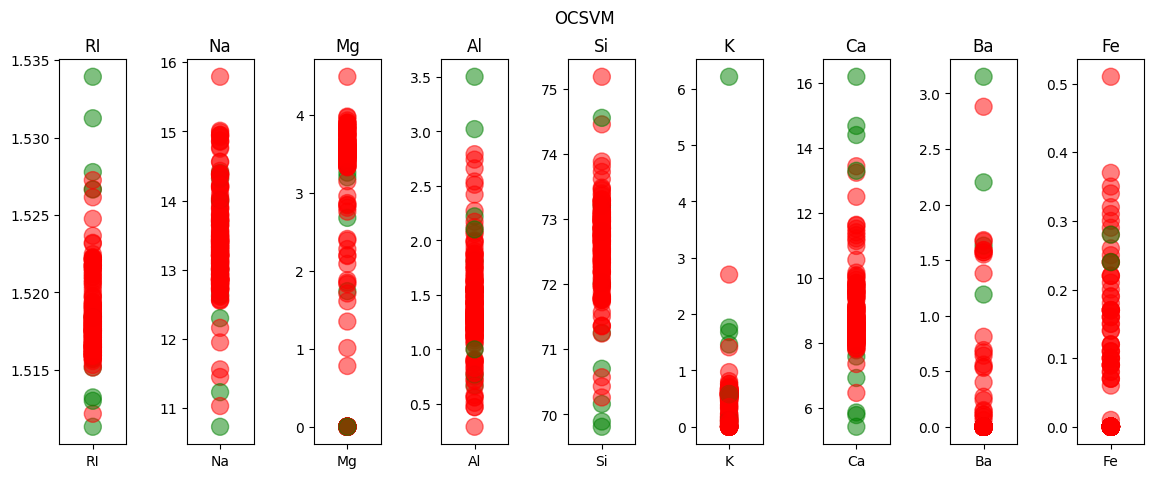

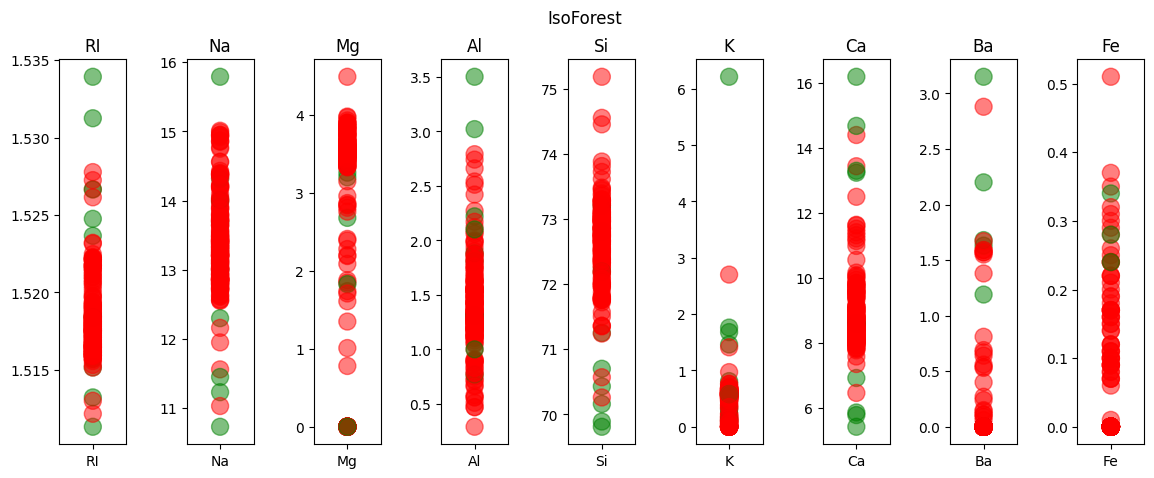

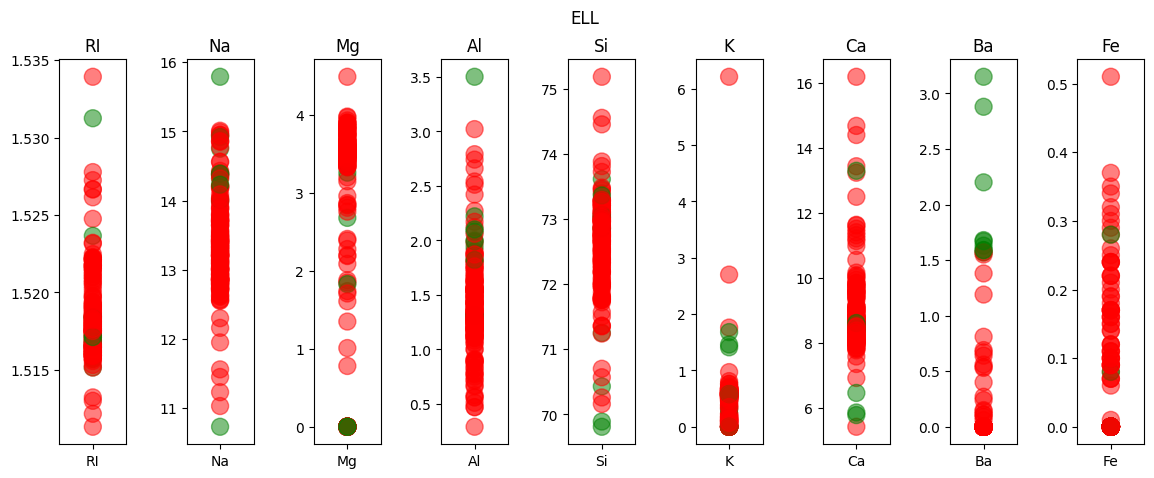

x:\_Netology\DS_ModelsParametersModule1\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


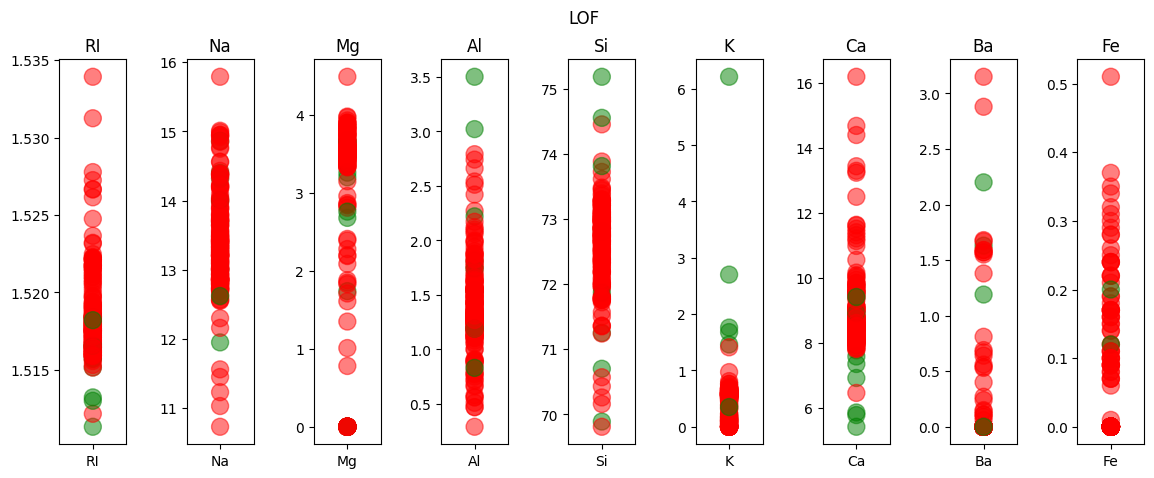

In [412]:
from sklearn.decomposition import PCA

colors = {1: 'red', -1: 'green'}

results = {}

for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(figsize=(14, 5))
    plt.suptitle(F"{clf_name}")
    # plt.xlabel('Признаки')
    clf.fit(X_train)
    z = clf.predict(X_train)
    results[clf_name] = z
    for i, column in enumerate(X_train.columns):
        plt.subplot(1, len(X_train.columns), i + 1)
        x = [0 for x in range(X_train.shape[0])]
        y = X_train[column]
        plt.scatter(x, y, c=[colors[x] for x in z], alpha=0.5, s=150)
        plt.title(F"{column}")
        plt.xticks(labels=[column], ticks=[0])
    plt.subplots_adjust(wspace=0.9)
    plt.show()

In [413]:
results["IsoForest"]

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1])

In [414]:
before_cut = y_train.value_counts().sort_index()
before_cut

Type
1    59
2    62
3    14
5     9
6     6
7    21
Name: count, dtype: int64

In [415]:
print(X_train.shape, y_train.shape)
X_train.drop(X_train[results["IsoForest"] == -1].index, inplace=True)
y_train.drop(y_train[results["IsoForest"] == -1].index, inplace=True)
print(X_train.shape, y_train.shape)

(171, 9) (171,)
(162, 9) (162,)


In [416]:
y_train.value_counts().sort_index()

Type
1    59
2    58
3    14
5     7
6     6
7    18
Name: count, dtype: int64

In [417]:
(1 - (y_train.value_counts().sort_index() / before_cut)).round(2) * 100

Type
1     0.0
2     6.0
3     0.0
5    22.0
6     0.0
7    14.0
Name: count, dtype: float64

1. **Загрузка и предварительный анализ данных**:
    - Загрузили данные из файла `glass.csv`.
    - Вывели первые и последние строки для ознакомления с данными.
    - Провели описательную статистику для всех колонок.

2. **Модель классификации**:
    - Разделили данные на признаки (`X`) и целевую переменную (`y`).
    - Разделили данные на обучающую и тестовую выборки с помощью `train_test_split`.
    - Обучили модель случайного леса (`RandomForestClassifier`) на обучающей выборке.
    - Оценили качество модели по метрикам точности, полноты и F1-меры.

3. **Поиск выбросов**:
    - Использовали несколько методов для обнаружения выбросов: One-Class SVM, Isolation Forest, Elliptic Envelope, и Local Outlier Factor.
    - Нарисовали графики для визуализации выбросов по каждому признаку.
    - Определили выбросы и обновили обучающую выборку, удалив выбросы, найденные методом Isolation Forest.

4. **Анализ изменений после удаления выбросов**:
    - Провели анализ количества объектов, перед удалением и после удаления выбросов.
    - Определили процент удаления данных по каждому классу.